In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [3]:
df=pd.read_csv('mushrooms2.csv')

In [4]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
ord_enc = OrdinalEncoder()
df['class'] = ord_enc.fit_transform(df[['class']])


In [7]:
mushrooms_df=pd.get_dummies(df,drop_first=True)

In [8]:
mushrooms_df

,class,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1.0,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0.0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0.0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1.0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0.0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0.0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0.0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1.0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [9]:
mushrooms_df.columns

Index(['class', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-

## Check class balance: 

In [10]:
mushrooms_df['class'].value_counts()

0.0    4208
1.0    3916
Name: class, dtype: int64

## Looking at features using pairplots: 

In [11]:
idx_lst=[[1,5],[6,10],[11,15],[16,20],[21,25],[26,30],[31,35],[36,40],[41,45],[46,50]]
idx_lst2=[[51,55],[56,60],[61,65],[66,70],[71,75],[76,80],[81,85],[86,90],[91,96]]

In [12]:
def get_pairplots(idx_lst):
    for i in idx_lst:
        df=mushrooms_df.iloc[:,i[0]:i[1]]
        df['class']=mushrooms_df['class']
        print(sns.pairplot(df,hue='class'))

bruises_t, odor_n, gill-size_n, stalk-surface-above-ring_s, stalk-color-above-ring_p, stalk-color-above-ring_w, 
stalk-color-below-ring_w, ring-type_p, population_v

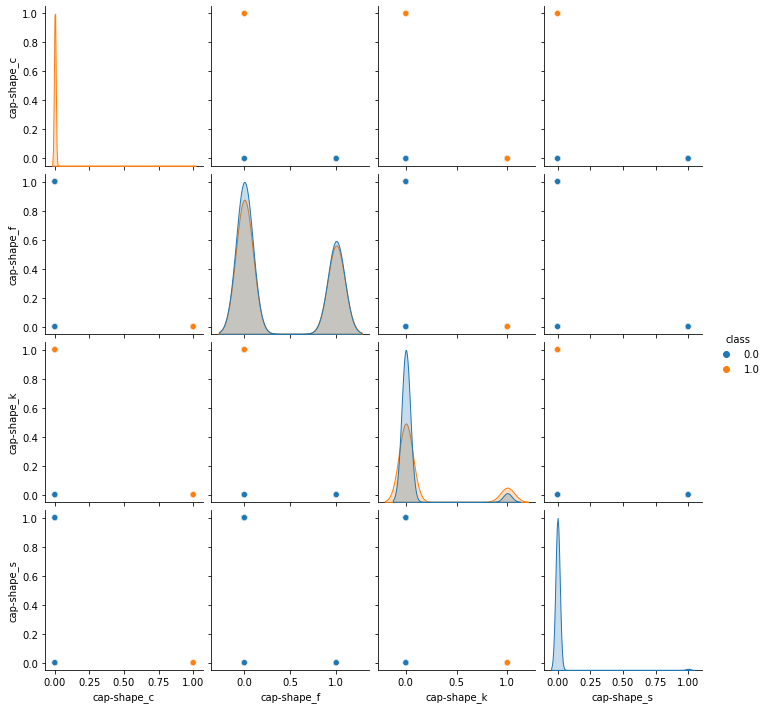

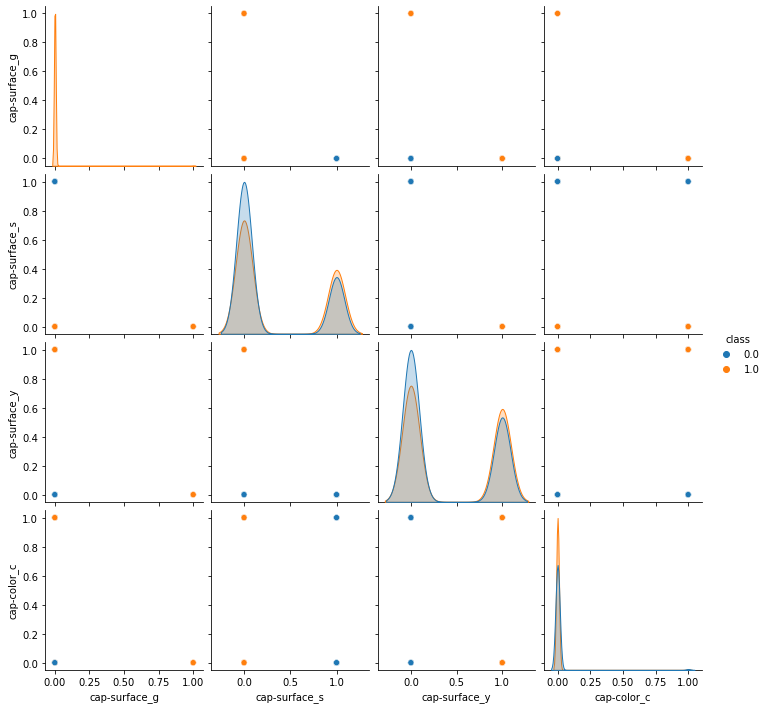

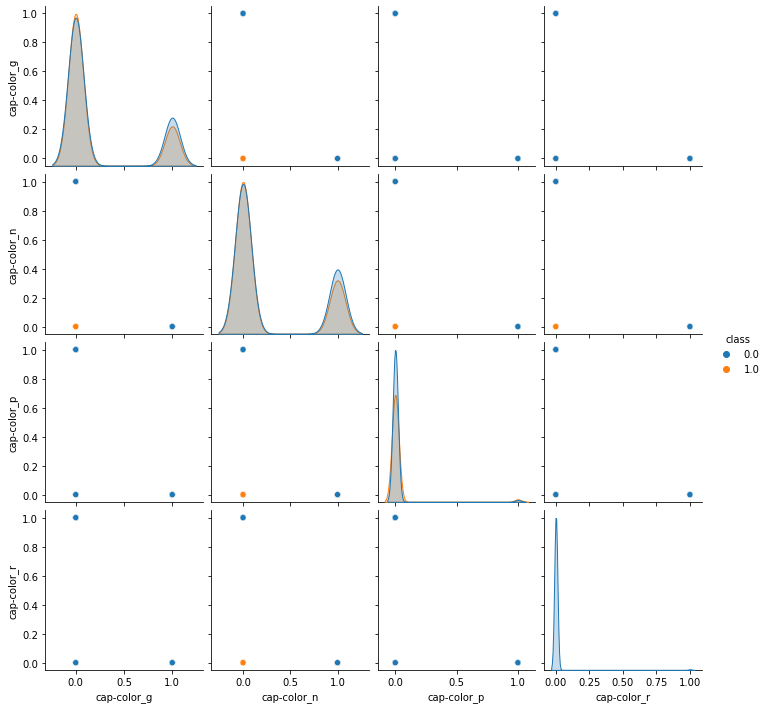

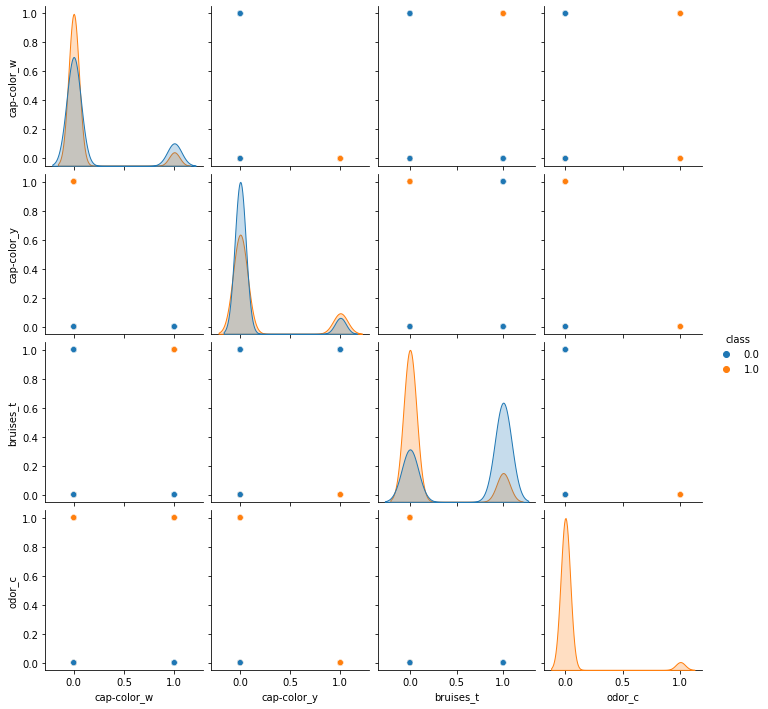

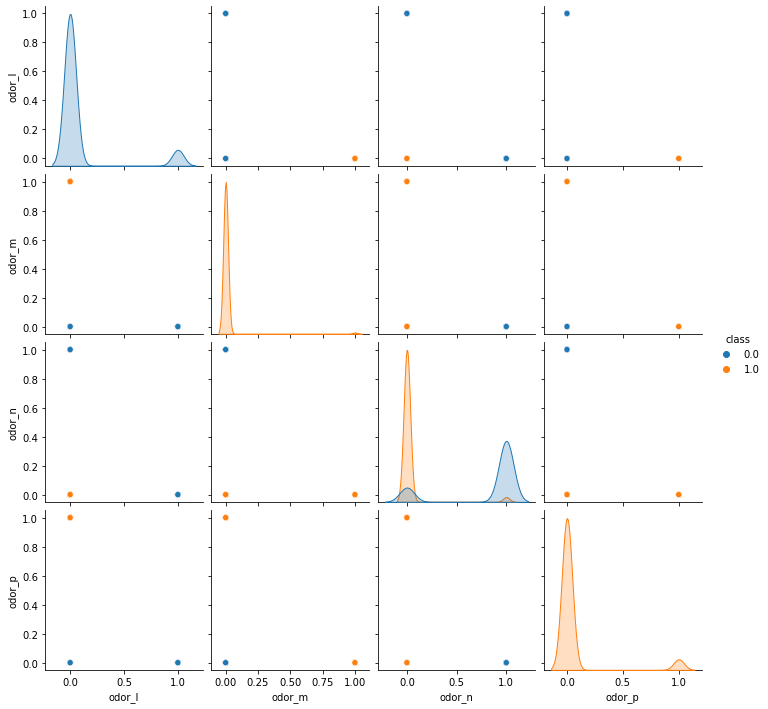

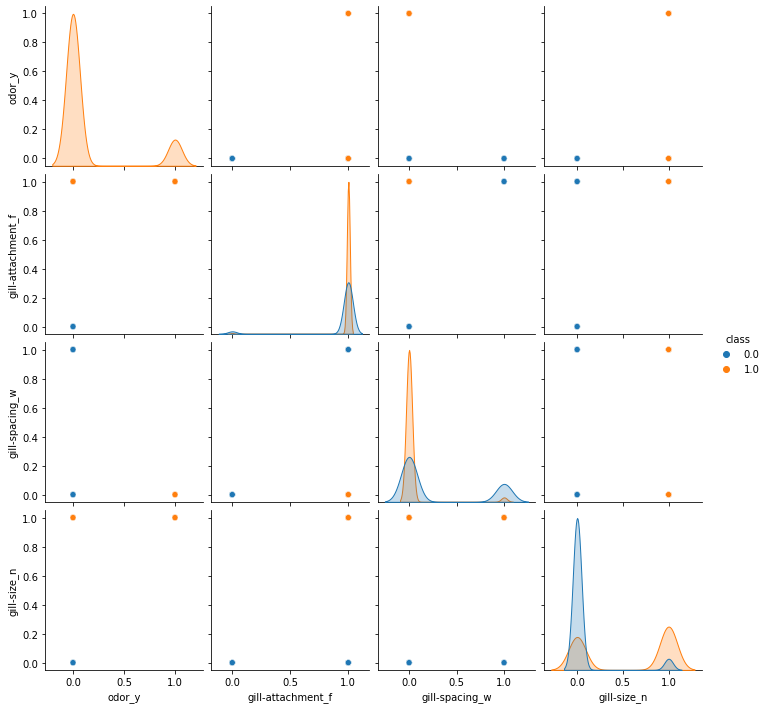

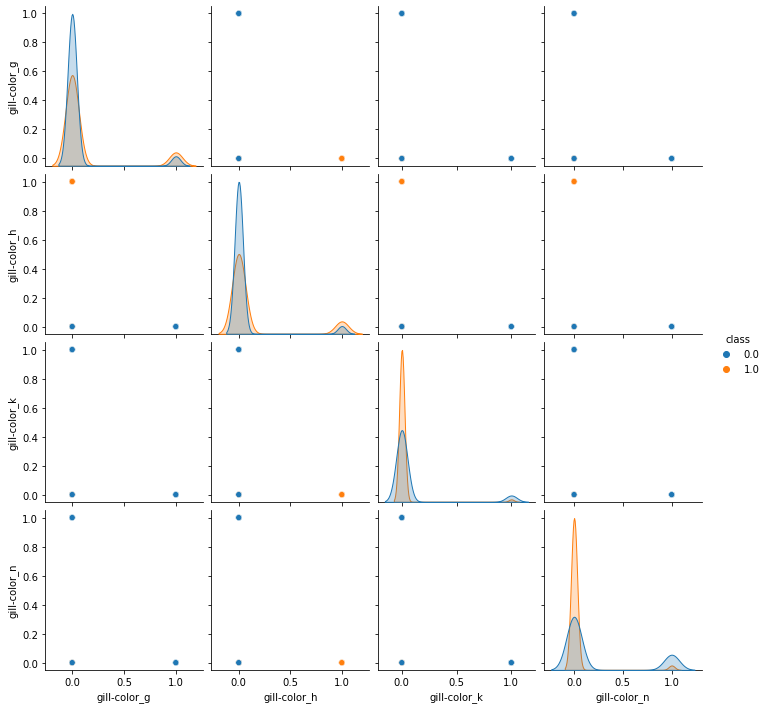

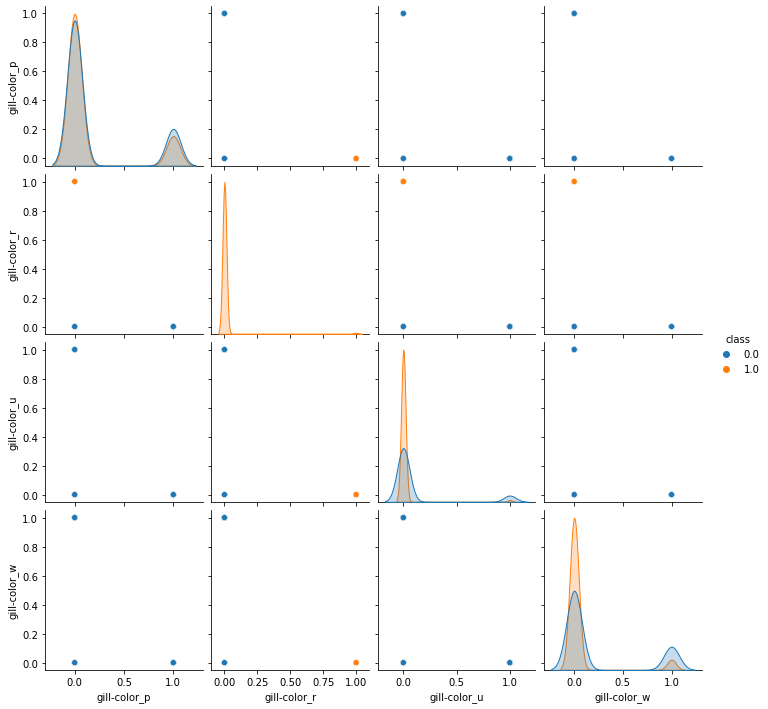

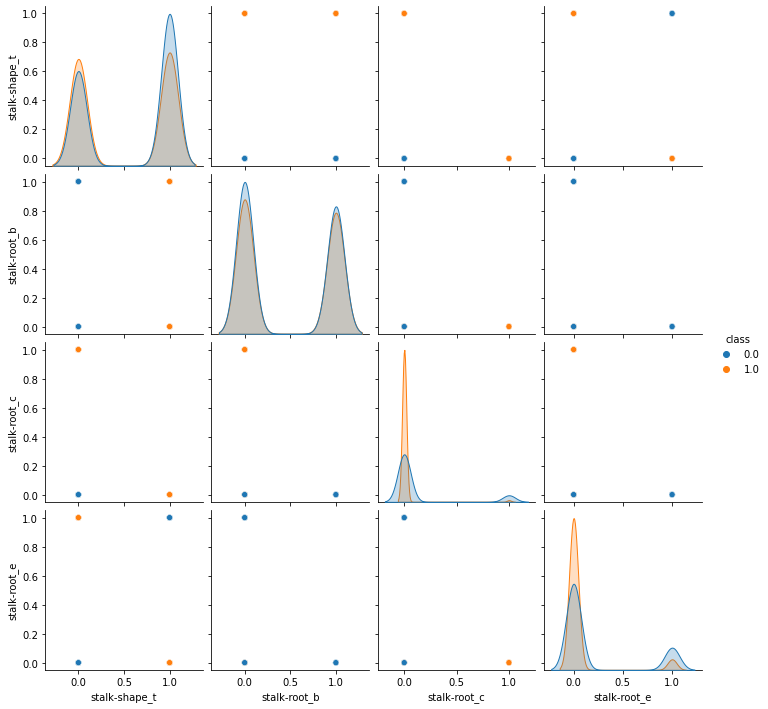

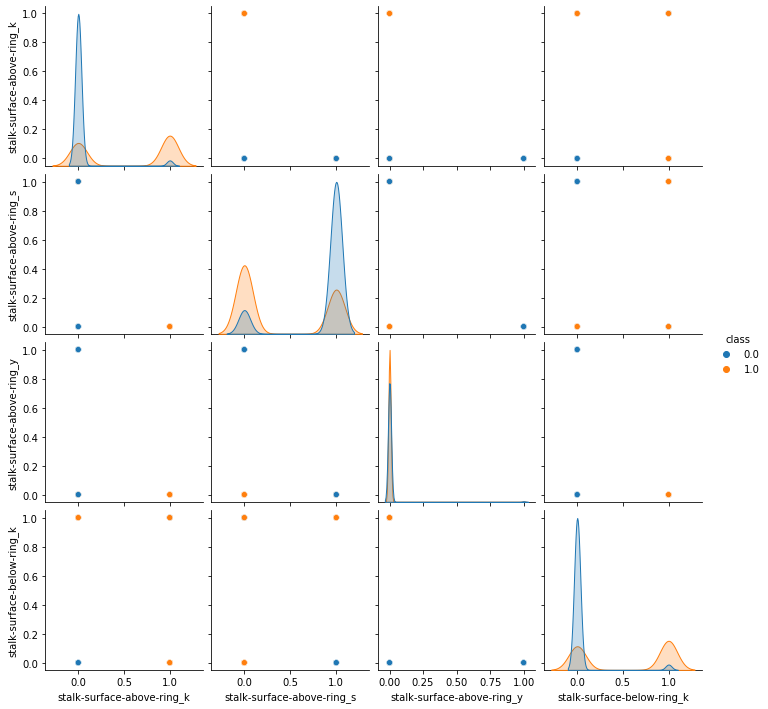

In [12]:
get_pairplots(idx_lst)

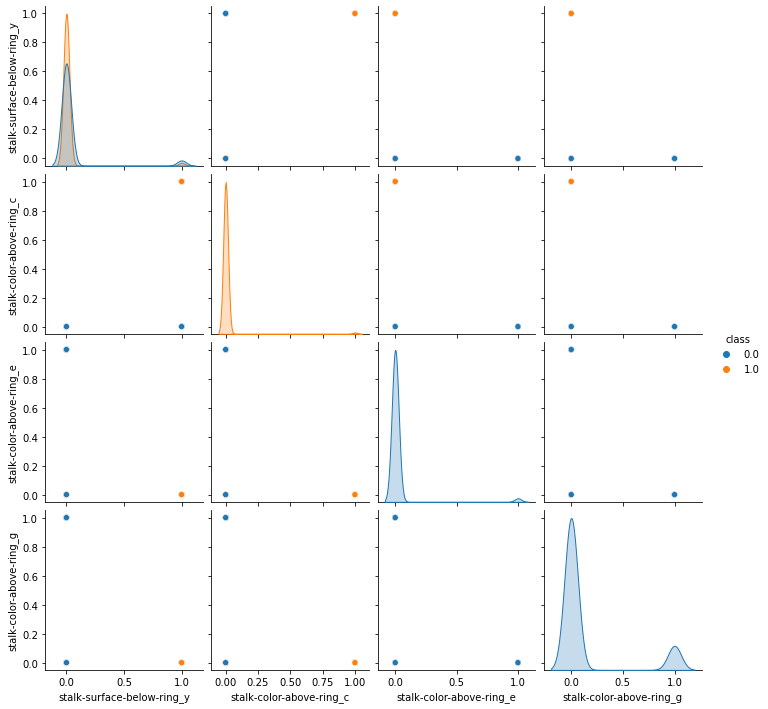

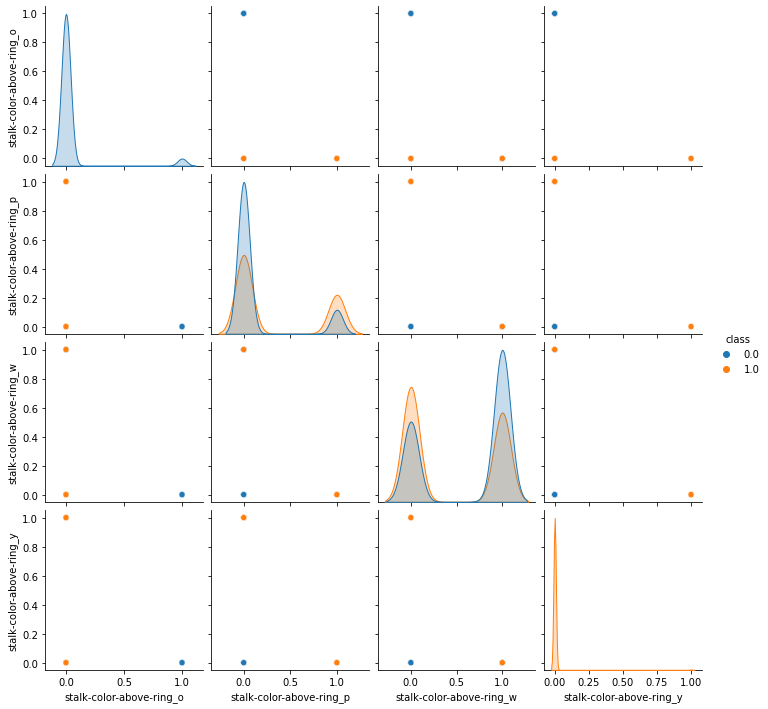

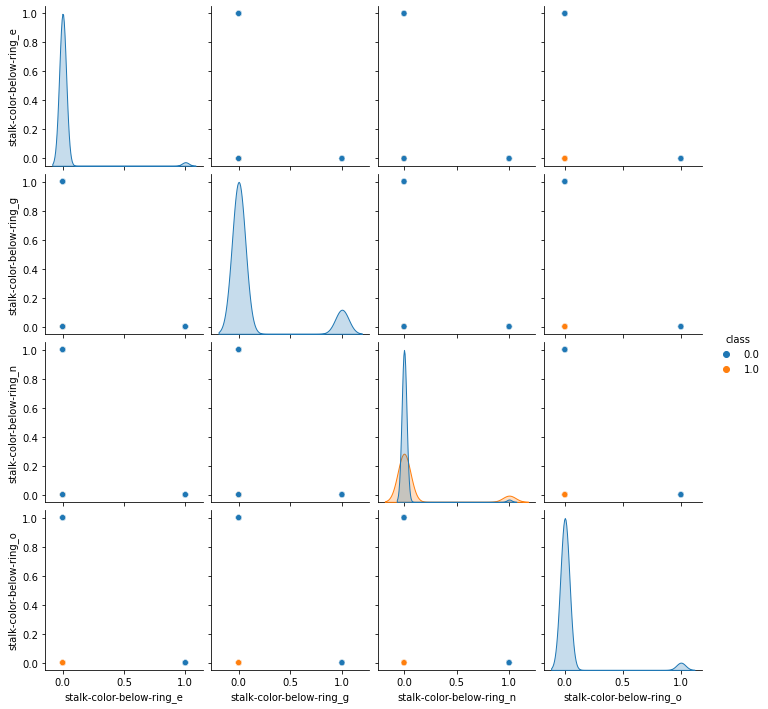

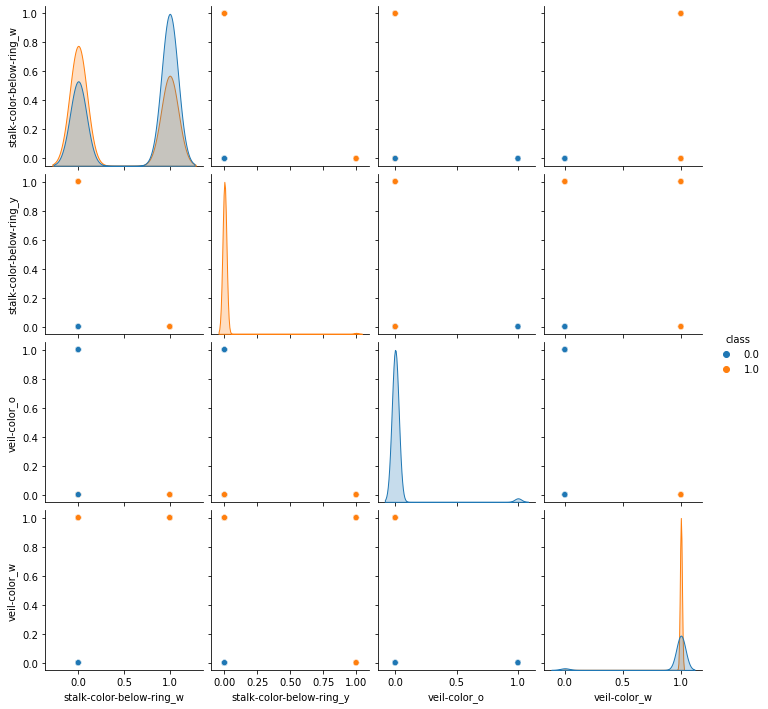

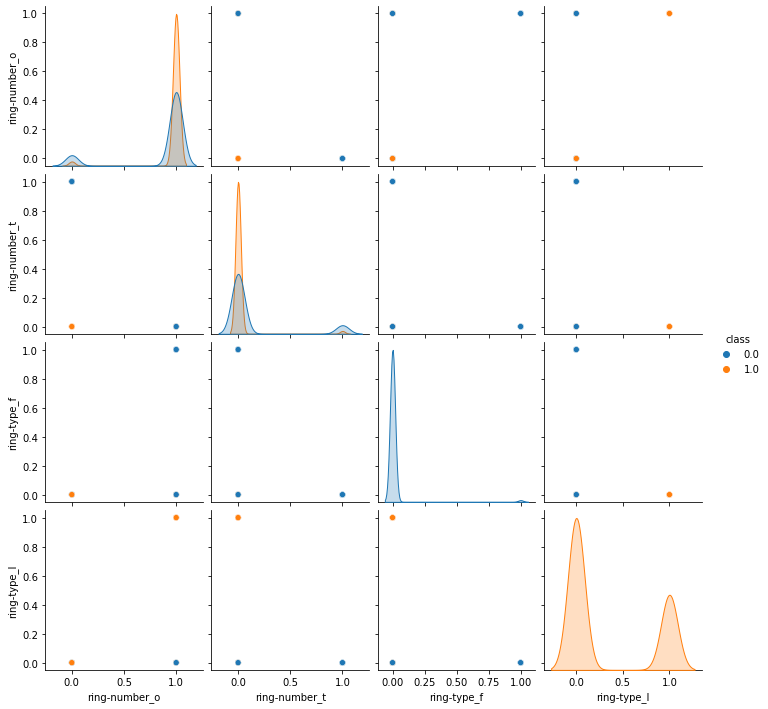

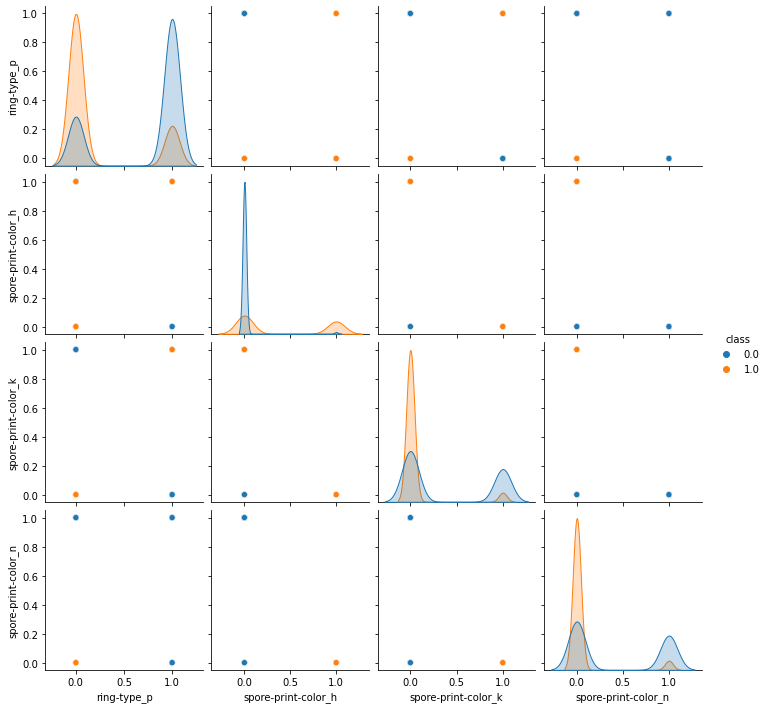

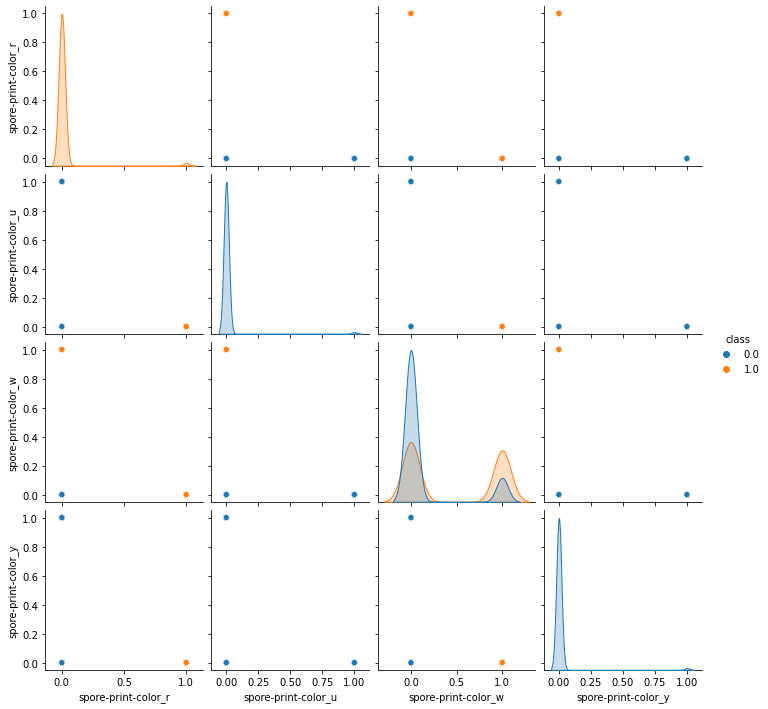

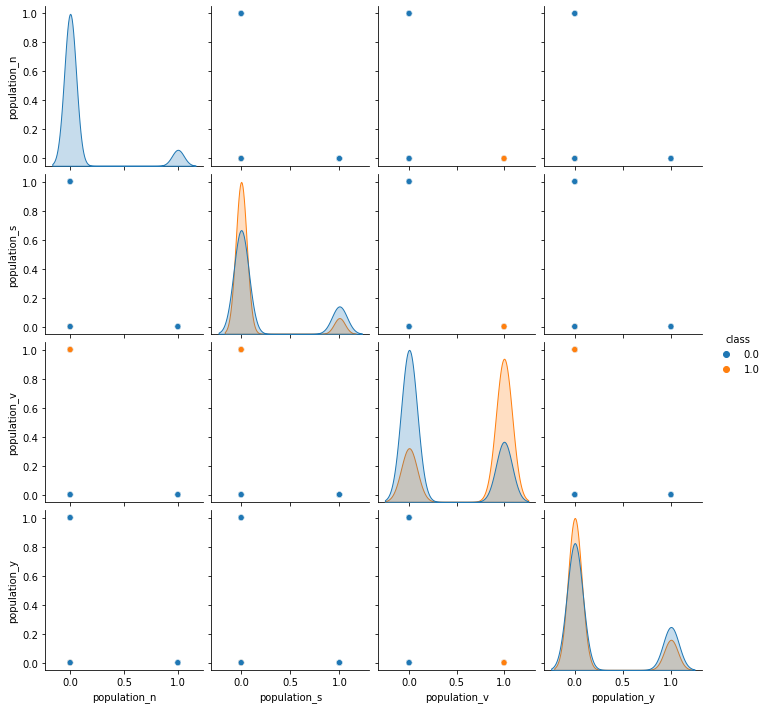

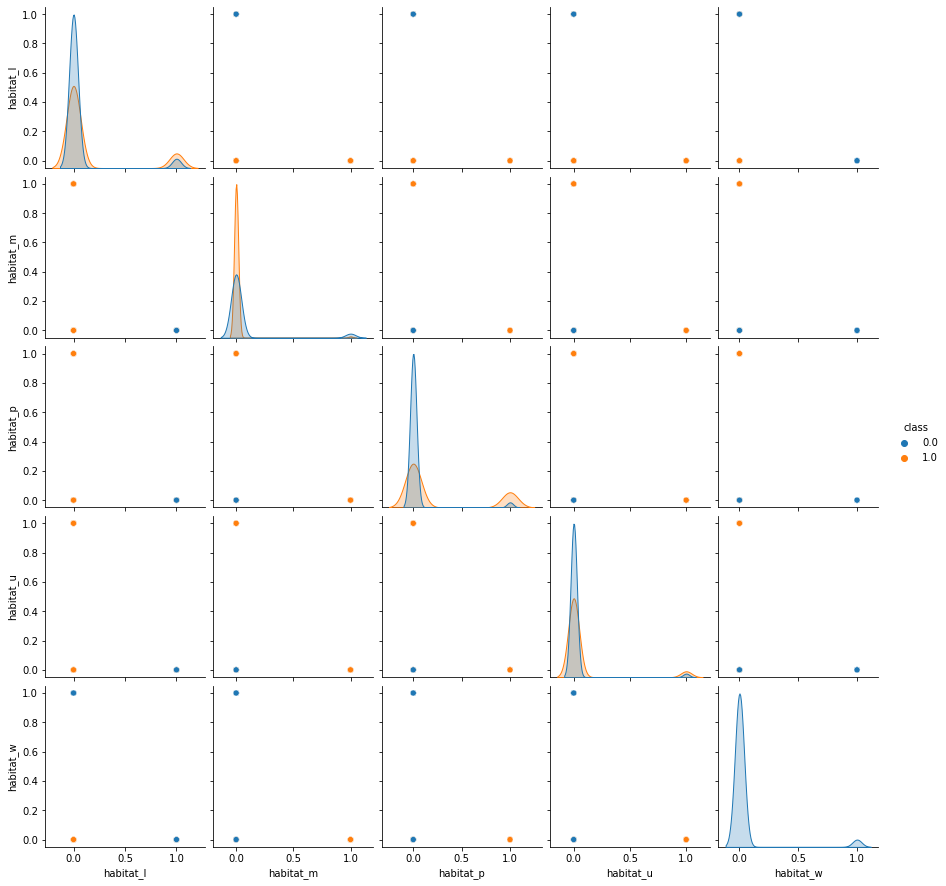

In [13]:
get_pairplots(idx_lst2)

## Creating a baseline using only odor features:

In [13]:
X_train_odor, X_test_odor, y_train_odor, y_test_odor = train_test_split(mushrooms_df.loc[:,'odor_c':'odor_y'], mushrooms_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

train_df_baseline = X_train_odor.copy()
train_df_baseline['class'] = y_train_odor
train_df_baseline.head()

,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,class
7873,0,0,0,0,0,0,1,0,1.0
6515,0,1,0,0,0,0,0,0,1.0
6141,0,0,0,0,0,0,0,1,1.0
2764,0,0,0,0,1,0,0,0,0.0
438,0,0,1,0,0,0,0,0,0.0


In [14]:
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_odor, y_train_odor)
print('train: {:6.2f}%'.format(100*lr.score(X_train_odor, y_train_odor)))
print('test: {:6.2f}%'.format(100*lr.score(X_test_odor, y_test_odor)))
print(classification_report(lr.predict(X_test_odor), y_test_odor))

train:  98.54%
test:  98.46%
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       868
         1.0       0.97      1.00      0.98       757

    accuracy                           0.98      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.98      0.98      1625



In [15]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_odor, y_train_odor)
print('train: {:6.2f}%'.format(100*knn.score(X_train_odor, y_train_odor)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_odor, y_test_odor)))
print(classification_report(knn.predict(X_test_odor),y_test_odor))

train:  98.54%
test:  98.46%
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       868
         1.0       0.97      1.00      0.98       757

    accuracy                           0.98      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.98      0.98      1625



### LR and KNN models using just odor features look good

## Creating a separate baseline for cap color:

In [16]:
X_train_color, X_test_color, y_train_color, y_test_color = train_test_split(mushrooms_df.loc[:,'cap-color_c':'cap-color_y'], mushrooms_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

train_df_baseline_color = X_train_color.copy()
train_df_baseline_color['class'] = y_train_color
train_df_baseline_color.head()

,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,class
7873,0,1,0,0,0,0,0,0,0,1.0
6515,0,0,0,1,0,0,0,0,0,1.0
6141,0,1,0,0,0,0,0,0,0,1.0
2764,0,0,0,1,0,0,0,0,0,0.0
438,0,0,0,0,0,0,0,0,1,0.0


In [17]:
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='lbfgs')
lr.fit(X_train_color, y_train_color)
#f1_score(lr.predict(X_test_color), y_test_color)
print(classification_report(lr.predict(X_test_color), y_test_color))

              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66      1056
         1.0       0.45      0.61      0.52       569

    accuracy                           0.60      1625
   macro avg       0.59      0.60      0.59      1625
weighted avg       0.64      0.60      0.61      1625



In [18]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_color, y_train_color)
#print('train: {:6.2f}%'.format(100*knn.score(X_train_color, y_train_color)))
#print('test: {:6.2f}%'.format(100*knn.score(X_test_color, y_test_color)))
print(classification_report(knn.predict(X_test_color),y_test_color))

              precision    recall  f1-score   support

         0.0       0.42      0.58      0.49       615
         1.0       0.67      0.52      0.58      1010

    accuracy                           0.54      1625
   macro avg       0.55      0.55      0.54      1625
weighted avg       0.58      0.54      0.55      1625



### LR and KNN models using just color aren't great. Let's see what happens when we combine cap color and odor:

## Combining features: 

In [19]:
m_df=mushrooms_df.loc[:,'class':'odor_y']
m_df=m_df.drop(['cap-shape_c','cap-shape_f','cap-shape_k','cap-shape_s','cap-shape_x','cap-surface_g',
               'cap-surface_s','cap-surface_y'],axis=1)

In [20]:
m_df

,class,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y
0,1.0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0
1,0.0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
2,0.0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0
3,1.0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8120,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8121,0.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8122,1.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [21]:
X_train_bl, X_test_bl, y_train_bl, y_test_bl = train_test_split(m_df.loc[:,'cap-color_c':'odor_y'], m_df.loc[:, 'class'], 
                                                    test_size = 0.3, random_state=42)

train_df_bl = X_train_bl.copy()
train_df_bl['class'] = y_train_bl
train_df_bl.head()

,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,class
5921,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1.0
1073,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0.0
3710,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1.0
144,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0.0
5469,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1.0


In [22]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_bl, y_train_bl)
print(classification_report(logit.predict(X_test_bl), y_test_bl))

              precision    recall  f1-score   support

         0.0       1.00      0.97      0.98      1296
         1.0       0.97      1.00      0.98      1142

    accuracy                           0.98      2438
   macro avg       0.98      0.98      0.98      2438
weighted avg       0.98      0.98      0.98      2438



In [23]:
print("Training: {:6.2f}%".format(100*logit.score(X_train_bl, y_train_bl)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_bl, y_test_bl)))

Training:  98.58%
Test set:  98.40%


In [24]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_bl, y_train_bl)
print('train: {:6.2f}%'.format(100*knn.score(X_train_bl, y_train_bl)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_bl, y_test_bl)))

train:  99.30%
test:  99.02%


Combining odor and cap color keeps the scores for these models high. 

In [25]:
y_predict_bl = logit.predict(X_test_bl)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test_bl, y_predict_bl), 
                                                     recall_score(y_test_bl, y_predict_bl)))

Default threshold:
Precision: 1.0000,   Recall: 0.9670


## Fitting knn and logit models using all of the features from the original data just to see what we get: 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(mushrooms_df.iloc[:, 1:], mushrooms_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

train_df = X_train.copy()
train_df['class'] = y_train
train_df.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
7873,0,0,1,0,0,0,1,0,0,1,...,0,1,0,0,0,0,0,0,0,1.0
6515,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,1.0
6141,0,1,0,0,0,0,0,1,0,1,...,0,1,0,0,1,0,0,0,0,1.0
2764,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.0
438,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0.0


In [27]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print('train: {:6.2f}%'.format(100*knn.score(X_train, y_train)))
print('test: {:6.2f}%'.format(100*knn.score(X_test, y_test)))
print(classification_report(knn.predict(X_test), y_test))

train: 100.00%
test: 100.00%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [28]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))
print(classification_report(logit.predict(X_test), y_test))

The score for logistic regression is
Training: 100.00%
Test set: 100.00%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [29]:
print("kNN confusion matrix: \n\n", confusion_matrix(y_test, knn.predict(X_test)))

kNN confusion matrix: 

 [[843   0]
 [  0 782]]


In [30]:
rc=RandomForestClassifier(n_estimators=100,max_features=10)
rc.fit(X_train,y_train)
y_predict=rc.predict(X_test)
print(classification_report(rc.predict(X_test), y_test))
#print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), recall_score(y_test, y_predict)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



ROC AUC score =  1.0


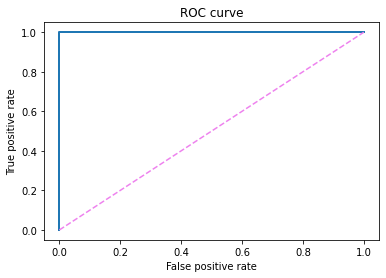

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, logit.predict_proba(X_test)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test, logit.predict_proba(X_test)[:,1]))

## This must be some great data. 

## Now trying the same models on the dataset after dropping some of the more impactful features (like odor): 

In [32]:
sm_df=mushrooms_df.drop(['bruises_t','odor_n','odor_c','odor_f','odor_l','odor_m','odor_p','odor_s','odor_y',
                         'gill-size_n','stalk-surface-above-ring_s','stalk-color-above-ring_p',
                        'stalk-color-above-ring_w','stalk-color-below-ring_w','ring-type_p','population_v'],axis=1) 

In [33]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(sm_df.iloc[:, 1:], sm_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

train_df_sm = X_train_sm.copy()
train_df_sm['class'] = y_train_sm
train_df_sm.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
7873,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1.0
6515,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1.0
6141,0,1,0,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,1.0
2764,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
438,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0.0


In [34]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm, y_train_sm)
print('train: {:6.2f}%'.format(100*knn.score(X_train_sm, y_train_sm)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_sm, y_test_sm)))
print(classification_report(knn.predict(X_test_sm), y_test_sm))

train:  99.98%
test:  99.94%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       842
         1.0       1.00      1.00      1.00       783

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [35]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_sm, y_train_sm)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train_sm, y_train_sm)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_sm, y_test_sm)))
print(classification_report(logit.predict(X_test_sm), y_test_sm))

The score for logistic regression is
Training:  99.42%
Test set:  98.77%
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       827
         1.0       1.00      0.98      0.99       798

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [36]:
rc=RandomForestClassifier(n_estimators=100,max_features=10)
rc.fit(X_train_sm,y_train_sm)
y_predict=rc.predict(X_test_sm)
print("Training: {:6.2f}%".format(100*rc.score(X_train_sm, y_train_sm)))
print("Test set: {:6.2f}%".format(100*rc.score(X_test_sm, y_test_sm)))
print(classification_report(rc.predict(X_test_sm), y_test_sm))
#print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict), recall_score(y_test, y_predict)))

Training: 100.00%
Test set: 100.00%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       843
         1.0       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



## A minor difference. 

Looking at features from a different angle...

In [37]:
feat_lst=[['cap-shape_c','cap-shape_x'],['cap-surface_g','cap-surface_y'],['cap-color_c','cap-color_y'],
    ['bruises_t','odor_y'],['gill-attachment_f','gill-size_n'],['gill-color_e','gill-color_y'],
    ['stalk-shape_t','stalk-root_r'],['stalk-surface-above-ring_k','stalk-surface-below-ring_y'],
    ['stalk-color-above-ring_c','stalk-color-above-ring_y'],['stalk-color-above-ring_c','stalk-color-below-ring_y'],
    ['veil-color_o','ring-type_p'],['spore-print-color_o','spore-print-color_y'],['population_c','habitat_w']]

In [38]:
def get_corrs(lst):
    for i in lst:
        df=mushrooms_df.loc[:,i[0]:i[1]]
        df['class']=mushrooms_df['class']
        print(df.corr())

In [39]:
get_corrs(feat_lst)

             cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  cap-shape_x  \
cap-shape_c     1.000000    -0.017672    -0.007477    -0.001396    -0.020077   
cap-shape_f    -0.017672     1.000000    -0.268226    -0.050070    -0.720235   
cap-shape_k    -0.007477    -0.268226     1.000000    -0.021185    -0.304733   
cap-shape_s    -0.001396    -0.050070    -0.021185     1.000000    -0.056884   
cap-shape_x    -0.020077    -0.720235    -0.304733    -0.056884     1.000000   
class           0.023007     0.018526     0.163565    -0.060664    -0.026886   

                class  
cap-shape_c  0.023007  
cap-shape_f  0.018526  
cap-shape_k  0.163565  
cap-shape_s -0.060664  
cap-shape_x -0.026886  
class        1.000000  
               cap-surface_g  cap-surface_s  cap-surface_y     class
cap-surface_g       1.000000      -0.015038      -0.018096  0.023007
cap-surface_s      -0.015038       1.000000      -0.552410  0.095454
cap-surface_y      -0.018096      -0.552410       1.000000  0.08

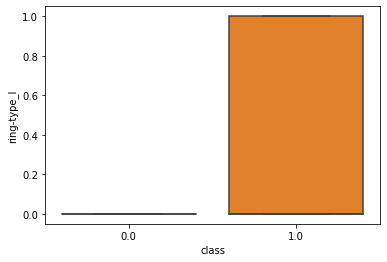

In [40]:
sns.boxplot(x='class', y='ring-type_l', data=train_df);

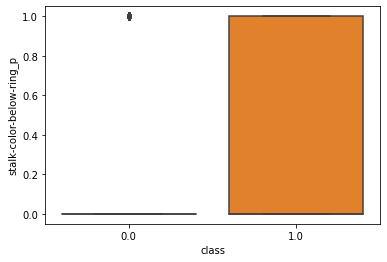

In [41]:
sns.boxplot(x='class', y='stalk-color-below-ring_p', data=train_df);

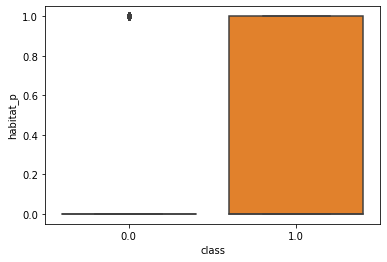

In [42]:
sns.boxplot(x='class', y='habitat_p', data=train_df);

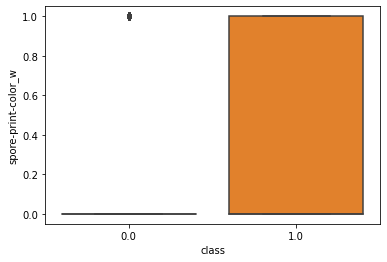

In [43]:
sns.boxplot(x='class', y='spore-print-color_w', data=train_df);

## Now looking at feature importances to identify more features that are 1) significant and 2) could be removed to see changes in the model 

In [44]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (16, 6)

In [45]:
reg = RandomForestRegressor(n_estimators=1700)
reg.fit(X_train,y_train)
reg.score(X_test,y_test)

0.9999996357923447

In [46]:
feat_importance_df = pd.DataFrame(reg.feature_importances_,index=X_train.columns, columns=['feature importance']).sort_values('feature importance', ascending=False)
feat_importance_df.head(20)

,feature importance
odor_n,0.623208
stalk-root_c,0.176674
stalk-surface-below-ring_y,0.050282
stalk-root_r,0.039107
spore-print-color_r,0.034005
spore-print-color_u,0.012637
odor_l,0.012390
bruises_t,0.009569
gill-spacing_w,0.005043
stalk-shape_t,0.003738


In [47]:
features_df=feat_importance_df.head(20)

In [48]:
df_feature_all = pd.DataFrame([tree.feature_importances_ for tree in reg.estimators_])
df_feature_all.head()

,0,1,2,3,4,5,6,7,8,9,...,85,86,87,88,89,90,91,92,93,94
0,0.003664,0.0,0.0,0.0,0.0,0.000615,0.0,0.0,0.0,0.0,...,0.0,0.0,0.002347,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000615,0.0,0.0,0.0,0.0,0.004290,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000615,0.0,0.0,0.0,0.0,0.003068,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.001839,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000613,0.0,0.0,0.0,0.0,0.001226,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df_feature_long = pd.melt(df_feature_all,var_name='feature name', value_name='values')


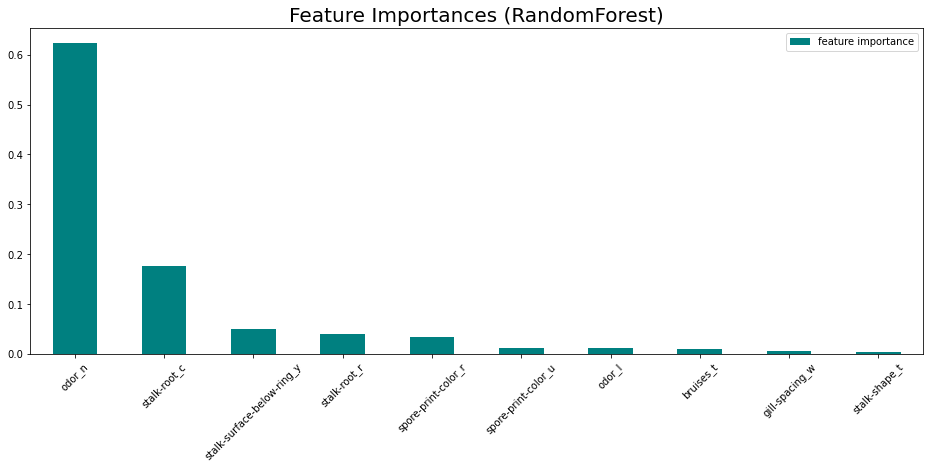

In [50]:
feat_importance_df.head(10).plot(kind='bar', color='teal')
plt.title('Feature Importances (RandomForest)', size=20)
plt.xticks(rotation=45)
plt.savefig('feat_importance_rf.jpg');


In [51]:
model = XGBClassifier()
model.fit(X_train, y_train)
importances_dict={'Feature':X_train.columns,'Importance':model.feature_importances_}

[10:00:00] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [52]:
importances = pd.DataFrame(data=importances_dict)
importances = importances.sort_values(by='Importance', ascending=False).head(10)

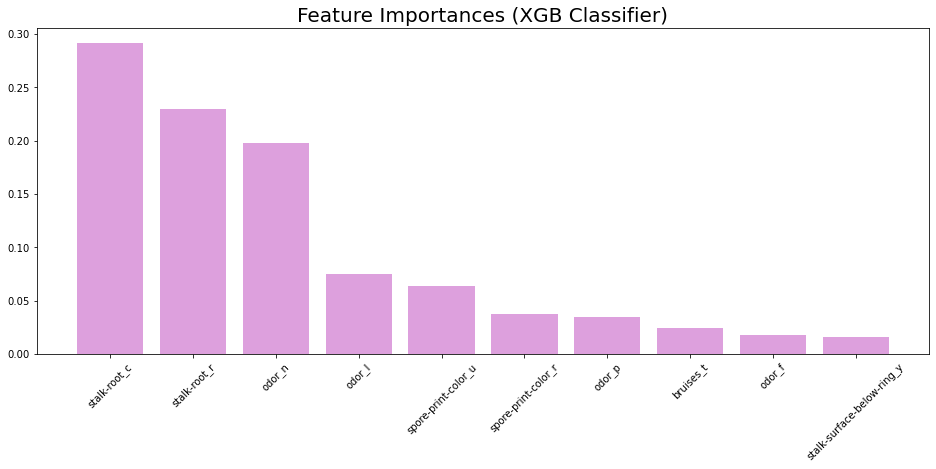

<Figure size 1152x432 with 0 Axes>

In [53]:
plt.bar(x=importances['Feature'], height=importances['Importance'], color='plum')
plt.title('Feature Importances (XGB Classifier)', size=20)
plt.xticks(rotation=45)
plt.show()
plt.savefig('feat_importances_xgb.jpg')

In [54]:
importances.head()

,Feature,Importance
42,stalk-root_c,0.291331
44,stalk-root_r,0.229301
22,odor_n,0.198048
20,odor_l,0.075331
81,spore-print-color_u,0.063177


In [55]:
sm_df.columns

Index(['class', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'gill-attachment_f', 'gill-spacing_w', 'gill-color_e',
       'gill-color_g', 'gill-color_h', 'gill-color_k', 'gill-color_n',
       'gill-color_o', 'gill-color_p', 'gill-color_r', 'gill-color_u',
       'gill-color_w', 'gill-color_y', 'stalk-shape_t', 'stalk-root_b',
       'stalk-root_c', 'stalk-root_e', 'stalk-root_r',
       'stalk-surface-above-ring_k', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_o',
       'stalk-color-above-ring_y', 'stalk-colo

In [56]:
sm_df2=sm_df.drop(['stalk-root_c','stalk-root_r','stalk-root_e'],axis=1)

In [57]:
X_train_sm2, X_test_sm2, y_train_sm2, y_test_sm2 = train_test_split(sm_df2.iloc[:, 1:], sm_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

train_df_sm2 = X_train_sm2.copy()
train_df_sm2['class'] = y_train_sm2

In [58]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm2, y_train_sm2)
print('train: {:6.2f}%'.format(100*knn.score(X_train_sm2, y_train_sm2)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_sm2, y_test_sm2)))
print(classification_report(knn.predict(X_test_sm2), y_test_sm2))

train:  99.68%
test:  99.45%
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99       852
         1.0       0.99      1.00      0.99       773

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [59]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_sm2, y_train_sm2)
print("Training: {:6.2f}%".format(100*logit.score(X_train_sm2, y_train_sm2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_sm2, y_test_sm2)))
print(classification_report(logit.predict(X_test_sm2), y_test_sm2))

Training:  98.80%
Test set:  97.78%
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       825
         1.0       0.99      0.97      0.98       800

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



knn is slightly better than logistic regression, but both are still very high 

In [60]:
sm_df2=sm_df2.drop(['spore-print-color_h',
       'spore-print-color_k', 'spore-print-color_n', 'spore-print-color_o',
       'spore-print-color_r', 'spore-print-color_u', 'spore-print-color_w',
       'spore-print-color_y','stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y'],axis=1)

In [61]:
X_train_sm2, X_test_sm2, y_train_sm2, y_test_sm2 = train_test_split(sm_df2.iloc[:, 1:], sm_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [62]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm2, y_train_sm2)
print('train: {:6.2f}%'.format(100*knn.score(X_train_sm2, y_train_sm2)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_sm2, y_test_sm2)))
print(classification_report(knn.predict(X_test_sm2), y_test_sm2))

train:  99.51%
test:  98.58%
              precision    recall  f1-score   support

         0.0       1.00      0.98      0.99       860
         1.0       0.97      1.00      0.99       765

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



In [63]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_sm2, y_train_sm2)
print("Training: {:6.2f}%".format(100*logit.score(X_train_sm2, y_train_sm2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_sm2, y_test_sm2)))
print(classification_report(logit.predict(X_test_sm2), y_test_sm2))

Training:  98.08%
Test set:  97.48%
              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98       838
         1.0       0.98      0.97      0.97       787

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



Still not much of a difference....let's remove more

In [64]:
sm_df2=sm_df2.drop(['stalk-color-below-ring_e', 'stalk-color-below-ring_g',
       'stalk-color-below-ring_n', 'stalk-color-below-ring_o',
       'stalk-color-below-ring_p', 'stalk-color-below-ring_y','habitat_g', 'habitat_l', 'habitat_m', 'habitat_p',
       'habitat_u', 'habitat_w'],axis=1)

In [65]:
X_train_sm2, X_test_sm2, y_train_sm2, y_test_sm2 = train_test_split(sm_df2.iloc[:, 1:], sm_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [66]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sm2, y_train_sm2)
print('train: {:6.2f}%'.format(100*knn.score(X_train_sm2, y_train_sm2)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_sm2, y_test_sm2)))
print(classification_report(knn.predict(X_test_sm2), y_test_sm2))

train:  99.14%
test:  98.09%
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       856
         1.0       0.97      0.99      0.98       769

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625



In [67]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_sm2, y_train_sm2)
print("Training: {:6.2f}%".format(100*logit.score(X_train_sm2, y_train_sm2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_sm2, y_test_sm2)))
print(classification_report(logit.predict(X_test_sm2), y_test_sm2))

Training:  97.40%
Test set:  97.17%
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.97       853
         1.0       0.96      0.98      0.97       772

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



## Okay...taking another approach. Let's see which features can be used *alone* to predict poisonousness. We already know that odor alone is a great indicator of poisonoussness. What else? 

In [68]:
stalk_root_df=mushrooms_df.loc[:,'stalk-root_b':'stalk-root_r']
stalk_root_df['class']=mushrooms_df['class']

In [69]:
stalk_root_df

,stalk-root_b,stalk-root_c,stalk-root_e,stalk-root_r,class
0,0,0,1,0,1.0
1,0,1,0,0,0.0
2,0,1,0,0,0.0
3,0,0,1,0,1.0
4,0,0,1,0,0.0
...,...,...,...,...,...
8119,0,0,0,0,0.0
8120,0,0,0,0,0.0
8121,0,0,0,0,0.0
8122,0,0,0,0,1.0


In [70]:
X_train_sr, X_test_sr, y_train_sr, y_test_sr = train_test_split(stalk_root_df.loc[:,'stalk-root_b':'stalk-root_r'], stalk_root_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [71]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_sr, y_train_sr)
print('train: {:6.2f}%'.format(100*knn.score(X_train_sr, y_train_sr)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_sr, y_test_sr)))
print(classification_report(knn.predict(X_test_sr), y_test_sr))

train:  64.63%
test:  64.49%
              precision    recall  f1-score   support

         0.0       0.84      0.62      0.71      1152
         1.0       0.43      0.72      0.54       473

    accuracy                           0.64      1625
   macro avg       0.64      0.67      0.63      1625
weighted avg       0.72      0.64      0.66      1625



In [72]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_sr, y_train_sr)
print("Training: {:6.2f}%".format(100*logit.score(X_train_sr, y_train_sr)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_sr, y_test_sr)))
print(classification_report(logit.predict(X_test_sr), y_test_sr))

Training:  64.63%
Test set:  64.49%
              precision    recall  f1-score   support

         0.0       0.84      0.62      0.71      1152
         1.0       0.43      0.72      0.54       473

    accuracy                           0.64      1625
   macro avg       0.64      0.67      0.63      1625
weighted avg       0.72      0.64      0.66      1625



### Stalk root doesn't seem to be a good (enough) indicator on its own. Also, KNN and logistic regression produce the exact same results..
### Let's try gbm for fun to see if that bumps up the accuracy. 

In [73]:

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

In [74]:
X_train_sr, X_val_sr, y_train_sr, y_val_sr = train_test_split(X_train_sr, y_train_sr, test_size=0.25, random_state=2)

In [75]:
eval_set=[(X_train_sr,y_train_sr),(X_val_sr,y_val_sr)]
fit_model = gbm.fit( 
                    X_train_sr, y_train_sr, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

In [76]:
accuracy_score(y_test_sr, gbm.predict(X_test_sr, ntree_limit=gbm.best_ntree_limit))

0.6449230769230769

### It's the same! 

## Let's move on to a different feature. What about spore print color?

In [77]:
spore_pcolor_df=mushrooms_df.loc[:,'spore-print-color_h':'spore-print-color_y']
spore_pcolor_df['class']=mushrooms_df['class']

In [78]:
spore_pcolor_df

,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,class
0,0,1,0,0,0,0,0,0,1.0
1,0,0,1,0,0,0,0,0,0.0
2,0,0,1,0,0,0,0,0,0.0
3,0,1,0,0,0,0,0,0,1.0
4,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0.0
8120,0,0,0,0,0,0,0,0,0.0
8121,0,0,0,0,0,0,0,0,0.0
8122,0,0,0,0,0,0,1,0,1.0


In [79]:
X_train_spc, X_test_spc, y_train_spc, y_test_spc = train_test_split(spore_pcolor_df.loc[:,'spore-print-color_h':'spore-print-color_y'], spore_pcolor_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [80]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_spc, y_train_spc)
print('train: {:6.2f}%'.format(100*knn.score(X_train_spc, y_train_spc)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_spc, y_test_spc)))
print(classification_report(knn.predict(X_test_spc), y_test_spc))

train:  86.74%
test:  87.08%
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       821
         1.0       0.88      0.86      0.87       804

    accuracy                           0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625



In [81]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_spc, y_train_spc)
print("Training: {:6.2f}%".format(100*logit.score(X_train_spc, y_train_spc)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_spc, y_test_spc)))
print(classification_report(logit.predict(X_test_spc), y_test_spc))

Training:  86.74%
Test set:  87.08%
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.87       821
         1.0       0.88      0.86      0.87       804

    accuracy                           0.87      1625
   macro avg       0.87      0.87      0.87      1625
weighted avg       0.87      0.87      0.87      1625



In [82]:
reg = RandomForestRegressor(n_estimators=1700)
reg.fit(X_train_spc,y_train_spc)
reg.score(X_test_spc,y_test_spc)

0.5722182340845515

Spore print color is more predictive of poisonousness than stalk root, but not enough so that I would be super happy having to rely on that feature alone

## Now let's look at stalk surface below ring: 

In [83]:
mushrooms_df.columns

Index(['class', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-

In [84]:
ssbr_df=mushrooms_df.loc[:,'stalk-surface-below-ring_k':'stalk-surface-below-ring_y']
ssbr_df['class']=mushrooms_df['class']

In [85]:
X_train_ssbr, X_test_ssbr, y_train_ssbr, y_test_ssbr = train_test_split(ssbr_df.loc[:,'stalk-surface-below-ring_k':'stalk-surface-below-ring_y'], ssbr_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [86]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_ssbr, y_train_ssbr)
print('train: {:6.2f}%'.format(100*knn.score(X_train_ssbr, y_train_ssbr)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_ssbr, y_test_ssbr)))
print(classification_report(knn.predict(X_test_ssbr), y_test_ssbr))

train:  53.55%
test:  54.15%
              precision    recall  f1-score   support

         0.0       0.17      0.77      0.27       182
         1.0       0.95      0.51      0.67      1443

    accuracy                           0.54      1625
   macro avg       0.56      0.64      0.47      1625
weighted avg       0.86      0.54      0.62      1625



In [87]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_ssbr, y_train_ssbr)
print("Training: {:6.2f}%".format(100*logit.score(X_train_ssbr, y_train_ssbr)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_ssbr, y_test_ssbr)))
print(classification_report(logit.predict(X_test_ssbr), y_test_ssbr))

Training:  76.81%
Test set:  75.82%
              precision    recall  f1-score   support

         0.0       0.96      0.69      0.81      1174
         1.0       0.54      0.93      0.68       451

    accuracy                           0.76      1625
   macro avg       0.75      0.81      0.74      1625
weighted avg       0.84      0.76      0.77      1625



In [88]:

gbm = xgb.XGBClassifier( 
                        n_estimators=30000,
                        max_depth=4,
                        objective='binary:logistic', #new objective
                        learning_rate=.05, 
                        subsample=.8,
                        min_child_weight=3,
                        colsample_bytree=.8
                       )

In [89]:
X_train_ssbr, X_val_ssbr, y_train_ssbr, y_val_ssbr = train_test_split(X_train_ssbr, y_train_ssbr, test_size=0.25, random_state=2)

In [90]:
eval_set=[(X_train_ssbr,y_train_ssbr),(X_val_ssbr,y_val_ssbr)]
fit_model = gbm.fit( 
                    X_train_ssbr, y_train_ssbr, 
                    eval_set=eval_set,
                    eval_metric='error', #new evaluation metric: classification error (could also use AUC, e.g.)
                    early_stopping_rounds=50,
                    verbose=False
                   )

In [91]:
accuracy_score(y_test_ssbr, gbm.predict(X_test_ssbr, ntree_limit=gbm.best_ntree_limit))

0.7581538461538462

## for stalk surface below ring, LR and gbm are better than kNN, but still not accurate enough for peace of mind

## Now let's look at stalk *color* below ring: 

In [92]:
scbr_df=mushrooms_df.loc[:,'stalk-color-below-ring_e':'stalk-color-below-ring_y']
scbr_df['class']=mushrooms_df['class']

In [93]:
X_train_scbr, X_test_scbr, y_train_scbr, y_test_scbr = train_test_split(scbr_df.loc[:,'stalk-color-below-ring_e':'stalk-color-below-ring_y'], scbr_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [94]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scbr, y_train_scbr)
print('train: {:6.2f}%'.format(100*knn.score(X_train_scbr, y_train_scbr)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_scbr, y_test_scbr)))
print(classification_report(knn.predict(X_test_scbr), y_test_scbr))

train:  58.95%
test:  58.40%
              precision    recall  f1-score   support

         0.0       0.20      1.00      0.33       167
         1.0       1.00      0.54      0.70      1458

    accuracy                           0.58      1625
   macro avg       0.60      0.77      0.51      1625
weighted avg       0.92      0.58      0.66      1625



In [95]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_scbr, y_train_scbr)
print("Training: {:6.2f}%".format(100*logit.score(X_train_scbr, y_train_scbr)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_scbr, y_test_scbr)))
print(classification_report(logit.predict(X_test_scbr), y_test_scbr))

Training:  71.66%
Test set:  70.58%
              precision    recall  f1-score   support

         0.0       0.84      0.67      0.75      1049
         1.0       0.56      0.76      0.65       576

    accuracy                           0.71      1625
   macro avg       0.70      0.72      0.70      1625
weighted avg       0.74      0.71      0.71      1625



## Stalk color above ring: 

In [96]:
scar_df=mushrooms_df.loc[:,'stalk-color-above-ring_e':'stalk-color-above-ring_y']
scar_df['class']=mushrooms_df['class']

In [97]:
X_train_scar, X_test_scar, y_train_scar, y_test_scar = train_test_split(scar_df.loc[:,'stalk-color-above-ring_e':'stalk-color-above-ring_y'], scar_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [98]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scar, y_train_scar)
print('train: {:6.2f}%'.format(100*knn.score(X_train_scar, y_train_scar)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_scar, y_test_scar)))
print(classification_report(knn.predict(X_test_scar), y_test_scar))

train:  71.64%
test:  71.63%
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76      1058
         1.0       0.57      0.78      0.66       567

    accuracy                           0.72      1625
   macro avg       0.71      0.73      0.71      1625
weighted avg       0.75      0.72      0.72      1625



In [99]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_scar, y_train_scar)
print("Training: {:6.2f}%".format(100*logit.score(X_train_scar, y_train_scar)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_scar, y_test_scar)))
print(classification_report(logit.predict(X_test_scar), y_test_scar))

Training:  71.64%
Test set:  71.63%
              precision    recall  f1-score   support

         0.0       0.85      0.68      0.76      1058
         1.0       0.57      0.78      0.66       567

    accuracy                           0.72      1625
   macro avg       0.71      0.73      0.71      1625
weighted avg       0.75      0.72      0.72      1625



## The pairplots showed some activity with gill-related features, so let's look at those: 

## First, gill color: 

In [100]:
gc_df=mushrooms_df.loc[:,'gill-color_e':'gill-color_y']
gc_df['class']=mushrooms_df['class']

In [101]:
X_train_gc, X_test_gc, y_train_gc, y_test_gc = train_test_split(gc_df.loc[:,'gill-color_e':'gill-color_y'], gc_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [102]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_gc, y_train_gc)
print('train: {:6.2f}%'.format(100*knn.score(X_train_gc, y_train_gc)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_gc, y_test_gc)))
print(classification_report(knn.predict(X_test_gc), y_test_gc))

train:  66.01%
test:  65.97%
              precision    recall  f1-score   support

         0.0       0.52      0.74      0.62       594
         1.0       0.81      0.61      0.69      1031

    accuracy                           0.66      1625
   macro avg       0.66      0.68      0.66      1625
weighted avg       0.70      0.66      0.67      1625



In [103]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_gc, y_train_gc)
print("Training: {:6.2f}%".format(100*logit.score(X_train_gc, y_train_gc)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_gc, y_test_gc)))
print(classification_report(logit.predict(X_test_gc), y_test_gc))

Training:  80.37%
Test set:  81.05%
              precision    recall  f1-score   support

         0.0       0.89      0.78      0.83       969
         1.0       0.72      0.86      0.79       656

    accuracy                           0.81      1625
   macro avg       0.81      0.82      0.81      1625
weighted avg       0.82      0.81      0.81      1625



LR is decent for gill color, but again, anything below 100% isn't ideal when it comes to poisonous mushrooms

## Let's add gill attachment, gill spacing, and gill size

In [104]:
gc_df['gill-attachment_f']=mushrooms_df['gill-attachment_f']
gc_df['gill-spacing_w']=mushrooms_df['gill-spacing_w']
gc_df['gill-size_n']=mushrooms_df['gill-size_n']

In [105]:
gc_df=gc_df.drop(['class'],axis=1)
gc_df['class']=mushrooms_df['class']

In [106]:
gc_df

,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,gill-attachment_f,gill-spacing_w,gill-size_n,class
0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1.0
1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0.0
2,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.0
3,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1.0
4,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
8120,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0
8121,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0.0
8122,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1.0


In [107]:
X_train_gc, X_test_gc, y_train_gc, y_test_gc = train_test_split(gc_df.loc[:,'gill-color_e':'gill-size_n'], gc_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [108]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_gc, y_train_gc)
print('train: {:6.2f}%'.format(100*knn.score(X_train_gc, y_train_gc)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_gc, y_test_gc)))
print(classification_report(knn.predict(X_test_gc), y_test_gc))

train:  80.44%
test:  79.69%
              precision    recall  f1-score   support

         0.0       0.62      0.98      0.76       531
         1.0       0.99      0.71      0.82      1094

    accuracy                           0.80      1625
   macro avg       0.80      0.84      0.79      1625
weighted avg       0.87      0.80      0.80      1625



In [109]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_gc, y_train_gc)
print("Training: {:6.2f}%".format(100*logit.score(X_train_gc, y_train_gc)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_gc, y_test_gc)))
print(classification_report(logit.predict(X_test_gc), y_test_gc))

Training:  86.98%
Test set:  88.12%
              precision    recall  f1-score   support

         0.0       0.92      0.86      0.89       906
         1.0       0.84      0.91      0.87       719

    accuracy                           0.88      1625
   macro avg       0.88      0.88      0.88      1625
weighted avg       0.88      0.88      0.88      1625



In [110]:
reg = RandomForestRegressor(n_estimators=1700)
reg.fit(X_train_gc,y_train_gc)
reg.score(X_test_gc,y_test_gc)

0.6963705175637978

## LR improved with the addition of the other gill-related features

## Cap color: 

In [111]:
cc_df=mushrooms_df.loc[:,'cap-color_c':'cap-color_y']
cc_df['class']=mushrooms_df['class']

In [112]:
X_train_cc, X_test_cc, y_train_cc, y_test_cc = train_test_split(cc_df.loc[:,'cap-color_c':'cap-color_y'], cc_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_cc, y_train_cc)
print('train: {:6.2f}%'.format(100*knn.score(X_train_cc, y_train_cc)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_cc, y_test_cc)))
print(classification_report(knn.predict(X_test_cc), y_test_cc))

train:  56.30%
test:  54.22%
              precision    recall  f1-score   support

         0.0       0.42      0.58      0.49       615
         1.0       0.67      0.52      0.58      1010

    accuracy                           0.54      1625
   macro avg       0.55      0.55      0.54      1625
weighted avg       0.58      0.54      0.55      1625



In [114]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_cc, y_train_cc)
print("Training: {:6.2f}%".format(100*logit.score(X_train_cc, y_train_cc)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_cc, y_test_cc)))
print(classification_report(logit.predict(X_test_cc), y_test_cc))

Training:  59.49%
Test set:  59.69%
              precision    recall  f1-score   support

         0.0       0.74      0.59      0.66      1056
         1.0       0.45      0.61      0.52       569

    accuracy                           0.60      1625
   macro avg       0.59      0.60      0.59      1625
weighted avg       0.64      0.60      0.61      1625



## Habitat:

In [115]:
h_df=mushrooms_df.loc[:,'habitat_g':'habitat_w']
h_df['class']=mushrooms_df['class']

In [116]:
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(h_df.loc[:,'habitat_g':'habitat_w'], h_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [117]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_h, y_train_h)
print('train: {:6.2f}%'.format(100*knn.score(X_train_h, y_train_h)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_h, y_test_h)))
print(classification_report(knn.predict(X_test_h), y_test_h))

train:  69.41%
test:  67.51%
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74      1153
         1.0       0.46      0.77      0.58       472

    accuracy                           0.68      1625
   macro avg       0.67      0.70      0.66      1625
weighted avg       0.75      0.68      0.69      1625



In [118]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_h, y_train_h)
print("Training: {:6.2f}%".format(100*logit.score(X_train_h, y_train_h)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_h, y_test_h)))
print(classification_report(logit.predict(X_test_h), y_test_h))

Training:  69.41%
Test set:  67.51%
              precision    recall  f1-score   support

         0.0       0.87      0.64      0.74      1153
         1.0       0.46      0.77      0.58       472

    accuracy                           0.68      1625
   macro avg       0.67      0.70      0.66      1625
weighted avg       0.75      0.68      0.69      1625



## Odor: 


In [119]:
odor_df=mushrooms_df.loc[:,'odor_c':'odor_y']
odor_df['class']=mushrooms_df['class']

In [120]:
X_train_odor, X_test_odor, y_train_odor, y_test_odor = train_test_split(odor_df.loc[:,'odor_c':'odor_y'], odor_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42)

In [121]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_odor, y_train_odor)
print('train: {:6.2f}%'.format(100*knn.score(X_train_odor, y_train_odor)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_odor, y_test_odor)))
print(classification_report(knn.predict(X_test_odor), y_test_odor))

train:  98.54%
test:  98.46%
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       868
         1.0       0.97      1.00      0.98       757

    accuracy                           0.98      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.98      0.98      1625



In [122]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_odor, y_train_odor)
print("Training: {:6.2f}%".format(100*logit.score(X_train_odor, y_train_odor)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_odor, y_test_odor)))
print(classification_report(logit.predict(X_test_odor), y_test_odor))

Training:  98.54%
Test set:  98.46%
              precision    recall  f1-score   support

         0.0       1.00      0.97      0.99       868
         1.0       0.97      1.00      0.98       757

    accuracy                           0.98      1625
   macro avg       0.98      0.99      0.98      1625
weighted avg       0.99      0.98      0.98      1625



In [123]:
reg = RandomForestRegressor(n_estimators=1700)
reg.fit(X_train_odor,y_train_odor)
reg.score(X_test_odor,y_test_odor)

0.9405804193111558

ROC AUC score =  0.9842618464684342


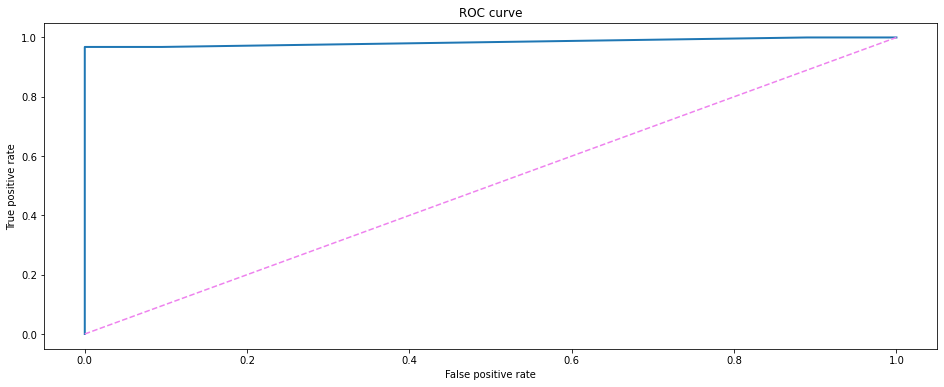

In [124]:
fpr, tpr, thresholds = roc_curve(y_test_odor, logit.predict_proba(X_test_odor)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test_odor, logit.predict_proba(X_test_odor)[:,1]))

## Now let's see how accurate we can make our models using a few of the features that we've seen to be fairly predictive above: 

spore print color, odor, gill features...

spore_pcolor_df,gc_df, odor_df

In [125]:
mushrooms_df.columns

Index(['class', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-

In [126]:
new_df=mushrooms_df.drop(['cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t','stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-above-ring_e', 'stalk-color-above-ring_g',
       'stalk-color-above-ring_n', 'stalk-color-above-ring_o',
       'stalk-color-above-ring_p', 'stalk-color-above-ring_w',
       'stalk-color-above-ring_y', 'stalk-color-below-ring_c',
       'stalk-color-below-ring_e', 'stalk-color-below-ring_g',
       'stalk-color-below-ring_n', 'stalk-color-below-ring_o',
       'stalk-color-below-ring_p', 'stalk-color-below-ring_w',
       'stalk-color-below-ring_y', 'veil-color_o', 'veil-color_w',
       'veil-color_y', 'ring-number_o', 'ring-number_t', 'ring-type_f',
       'ring-type_l', 'ring-type_n', 'ring-type_p','population_c', 'population_n', 'population_s',
       'population_v', 'population_y', 'habitat_g', 'habitat_l', 'habitat_m',
       'habitat_p', 'habitat_u', 'habitat_w'],axis=1)

In [127]:
new_df.columns

Index(['class', 'odor_c', 'odor_f', 'odor_l', 'odor_m', 'odor_n', 'odor_p',
       'odor_s', 'odor_y', 'gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y',
       'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n',
       'spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u',
       'spore-print-color_w', 'spore-print-color_y'],
      dtype='object')

In [128]:
X_train_combined, X_test_combined, y_train_combined, y_test_combined = train_test_split(new_df.loc[:,'odor_c':'spore-print-color_y'], new_df.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42) 

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_combined, y_train_combined)
print('train: {:6.2f}%'.format(100*knn.score(X_train_combined, y_train_combined)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_combined, y_test_combined)))
print(classification_report(knn.predict(X_test_combined), y_test_combined))

train:  99.85%
test:  99.88%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       845
         1.0       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



In [130]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_combined, y_train_combined)
print("Training: {:6.2f}%".format(100*logit.score(X_train_combined, y_train_combined)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_combined, y_test_combined)))
print(classification_report(logit.predict(X_test_combined), y_test_combined))

Training:  99.85%
Test set:  99.88%
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       845
         1.0       1.00      1.00      1.00       780

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



ROC AUC score =  0.9999817968344695


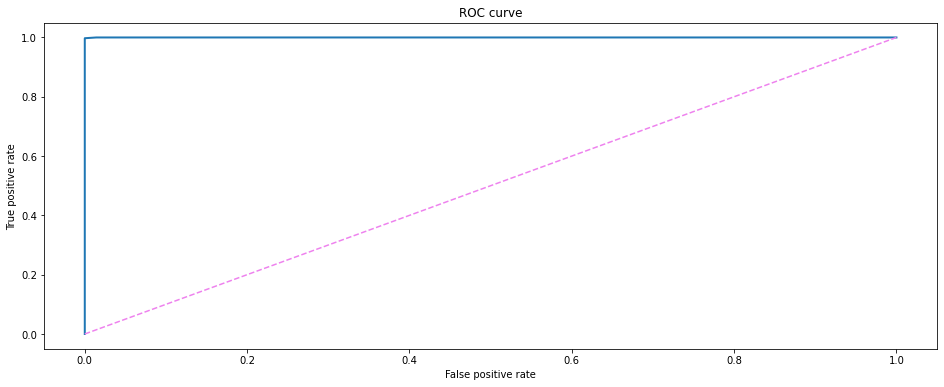

In [131]:
fpr, tpr, thresholds = roc_curve(y_test_combined, logit.predict_proba(X_test_combined)[:,1])
plt.plot(fpr, tpr,lw=2)
plt.plot([0,1],[0,1],c='violet',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])


plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');
print("ROC AUC score = ", roc_auc_score(y_test_combined, logit.predict_proba(X_test_combined)[:,1]))

## This is probably as good as it's going to get. So using just odor, spore print color, and gill features, we have nearly 100% confidence in our results. 

In [132]:
odor_df2=mushrooms_df.loc[:,'odor_l':'odor_n']
odor_df2['class']=mushrooms_df['class']

In [133]:
odor_df2

,odor_l,odor_m,odor_n,class
0,0,0,0,1.0
1,0,0,0,0.0
2,1,0,0,0.0
3,0,0,0,1.0
4,0,0,1,0.0
...,...,...,...,...
8119,0,0,1,0.0
8120,0,0,1,0.0
8121,0,0,1,0.0
8122,0,0,0,1.0


In [134]:
X_train_odor2, X_test_odor2, y_train_odor2, y_test_odor2 = train_test_split(odor_df2.loc[:,'odor_l':'odor_n'], odor_df2.loc[:, 'class'], 
                                                    test_size = 0.2, random_state=42) 

In [135]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_odor2, y_train_odor2)
print('train: {:6.2f}%'.format(100*knn.score(X_train_odor2, y_train_odor2)))
print('test: {:6.2f}%'.format(100*knn.score(X_test_odor2, y_test_odor2)))
print(classification_report(knn.predict(X_test_odor2), y_test_odor2))

train:  93.61%
test:  93.54%
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       788
         1.0       0.97      0.90      0.94       837

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [136]:
logit = LogisticRegression(C = 0.95)
logit.fit(X_train_odor2, y_train_odor2)
print("Training: {:6.2f}%".format(100*logit.score(X_train_odor2, y_train_odor2)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test_odor2, y_test_odor2)))
print(classification_report(logit.predict(X_test_odor2), y_test_odor2))

Training:  93.61%
Test set:  93.54%
              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94       788
         1.0       0.97      0.90      0.94       837

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625



In [137]:
mushrooms_df.columns

Index(['class', 'cap-shape_c', 'cap-shape_f', 'cap-shape_k', 'cap-shape_s',
       'cap-shape_x', 'cap-surface_g', 'cap-surface_s', 'cap-surface_y',
       'cap-color_c', 'cap-color_e', 'cap-color_g', 'cap-color_n',
       'cap-color_p', 'cap-color_r', 'cap-color_u', 'cap-color_w',
       'cap-color_y', 'bruises_t', 'odor_c', 'odor_f', 'odor_l', 'odor_m',
       'odor_n', 'odor_p', 'odor_s', 'odor_y', 'gill-attachment_f',
       'gill-spacing_w', 'gill-size_n', 'gill-color_e', 'gill-color_g',
       'gill-color_h', 'gill-color_k', 'gill-color_n', 'gill-color_o',
       'gill-color_p', 'gill-color_r', 'gill-color_u', 'gill-color_w',
       'gill-color_y', 'stalk-shape_t', 'stalk-root_b', 'stalk-root_c',
       'stalk-root_e', 'stalk-root_r', 'stalk-surface-above-ring_k',
       'stalk-surface-above-ring_s', 'stalk-surface-above-ring_y',
       'stalk-surface-below-ring_k', 'stalk-surface-below-ring_s',
       'stalk-surface-below-ring_y', 'stalk-color-above-ring_c',
       'stalk-color-

## Which odors in particular are indicative of poisonousness? 

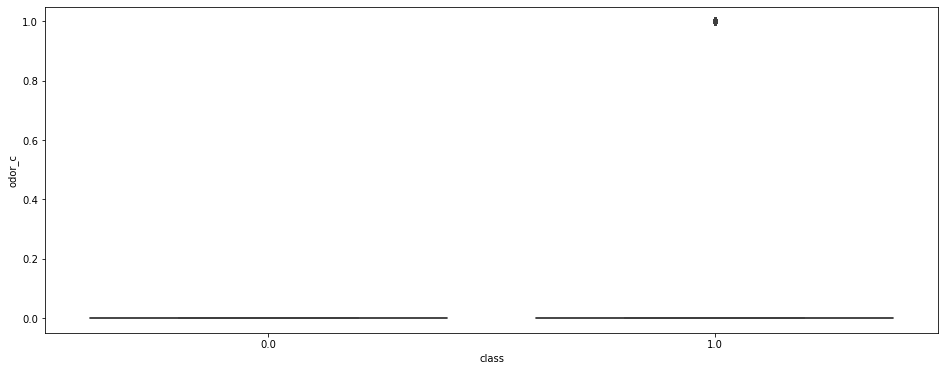

In [138]:
sns.boxplot(x='class', y='odor_c', data=train_df);

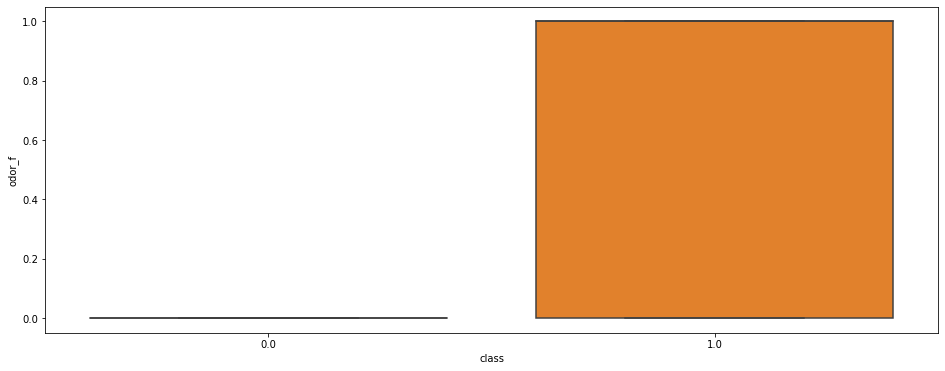

In [139]:
sns.boxplot(x='class', y='odor_f', data=train_df);

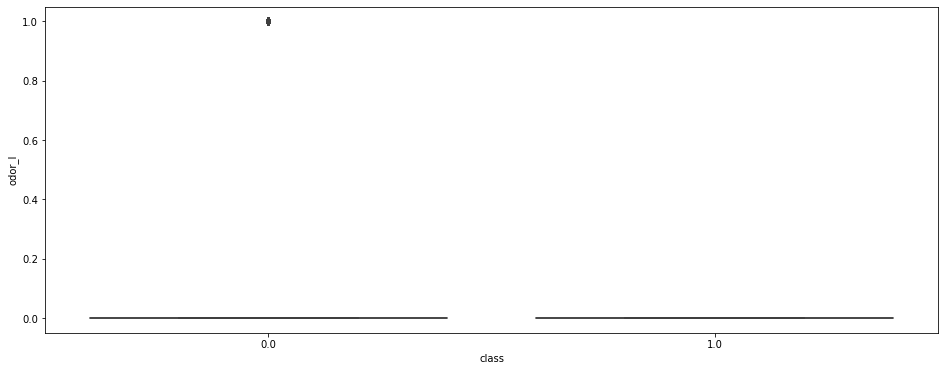

In [140]:
sns.boxplot(x='class', y='odor_l', data=train_df);

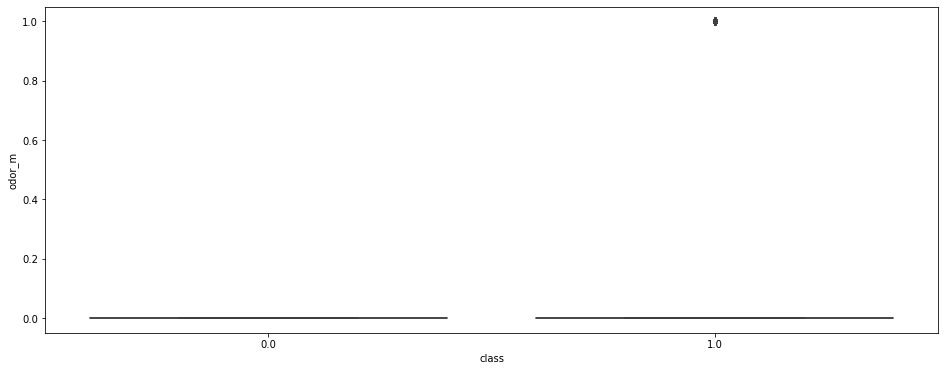

In [141]:
sns.boxplot(x='class', y='odor_m', data=train_df);

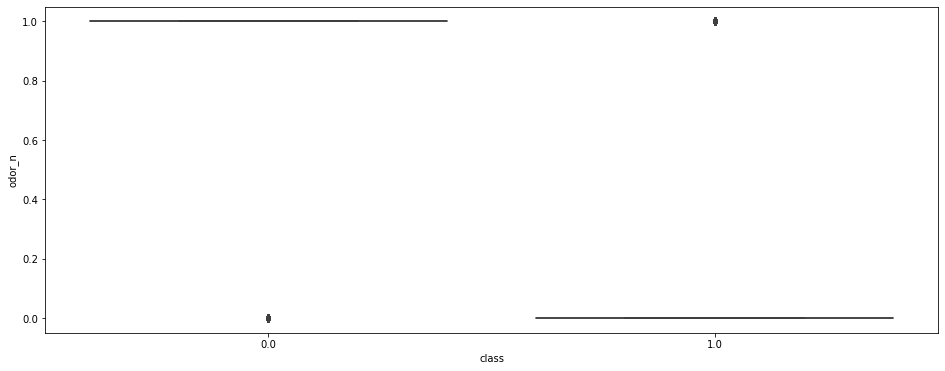

In [142]:
sns.boxplot(x='class', y='odor_n', data=train_df);

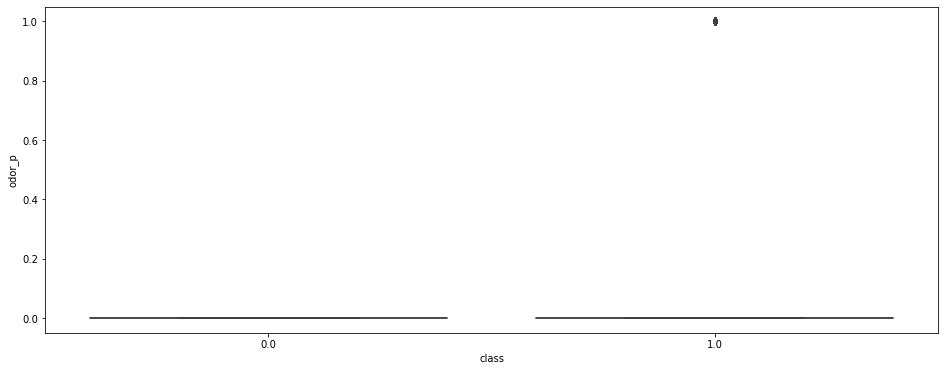

In [143]:
sns.boxplot(x='class', y='odor_p', data=train_df);

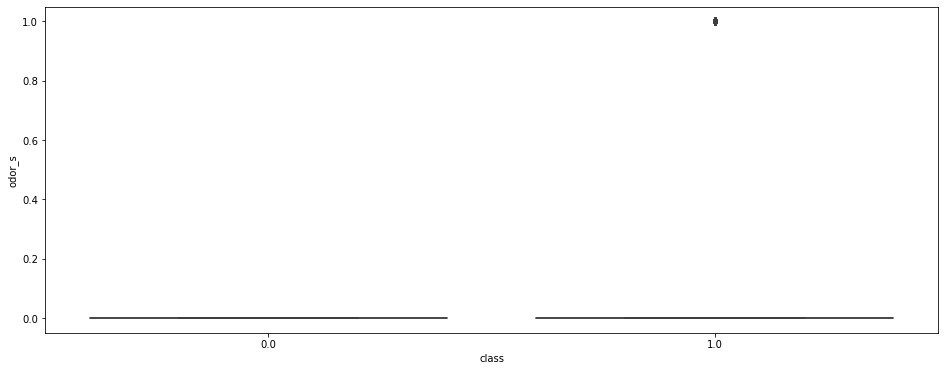

In [144]:
sns.boxplot(x='class', y='odor_s', data=train_df);

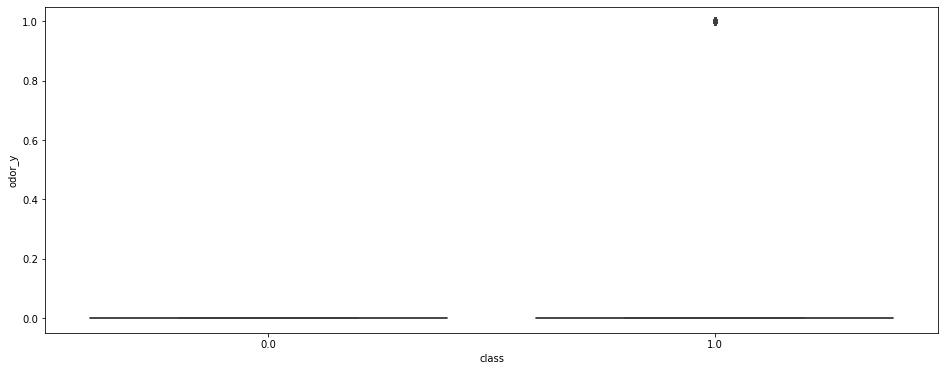

In [145]:
sns.boxplot(x='class', y='odor_y', data=train_df);

In [146]:
gill_lst=['gill-attachment_f', 'gill-spacing_w',
       'gill-size_n', 'gill-color_e', 'gill-color_g', 'gill-color_h',
       'gill-color_k', 'gill-color_n', 'gill-color_o', 'gill-color_p',
       'gill-color_r', 'gill-color_u', 'gill-color_w', 'gill-color_y']

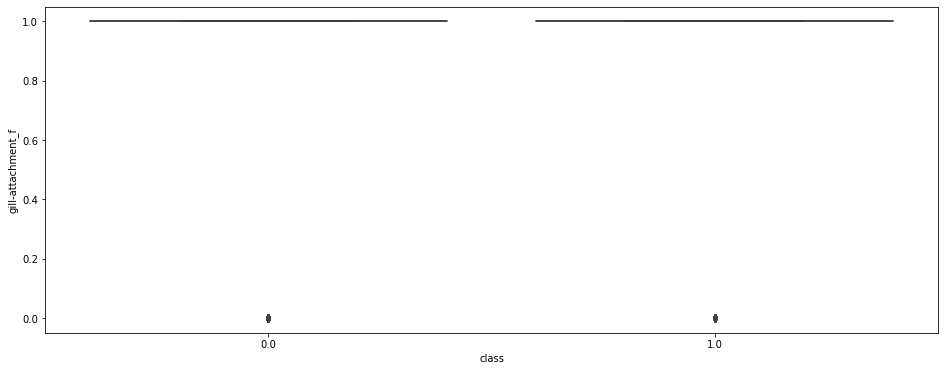

In [147]:
sns.boxplot(x='class', y='gill-attachment_f', data=train_df);


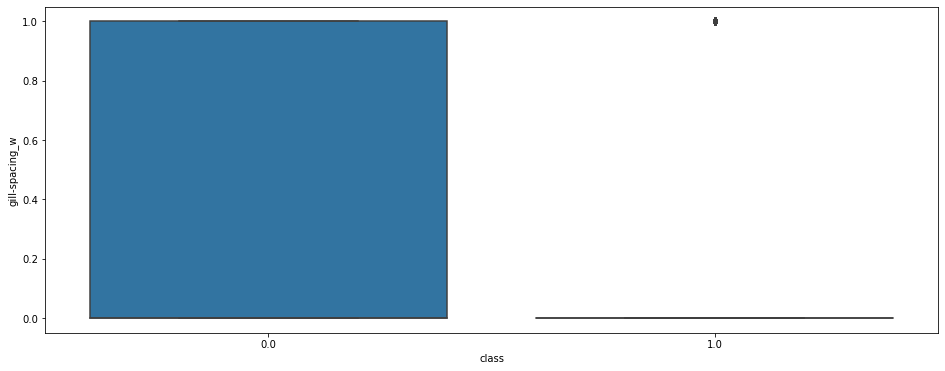

In [148]:
sns.boxplot(x='class', y='gill-spacing_w', data=train_df);


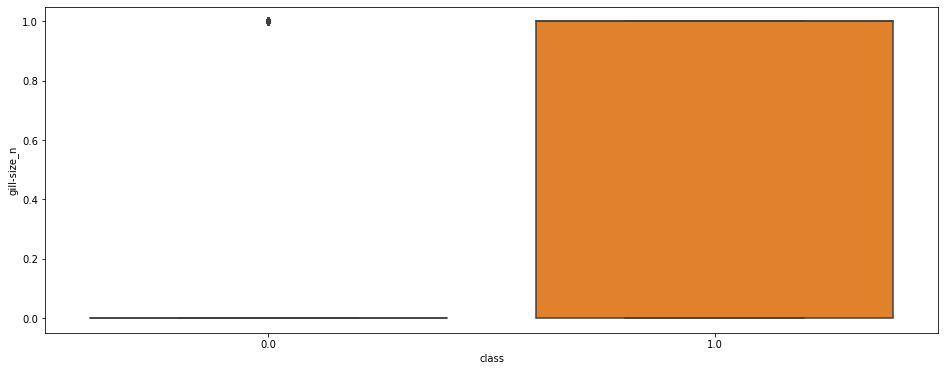

In [149]:
sns.boxplot(x='class', y='gill-size_n', data=train_df);

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

'spore-print-color_h', 'spore-print-color_k', 'spore-print-color_n',
       'spore-print-color_o', 'spore-print-color_r', 'spore-print-color_u',
       'spore-print-color_w', 'spore-print-color_y'

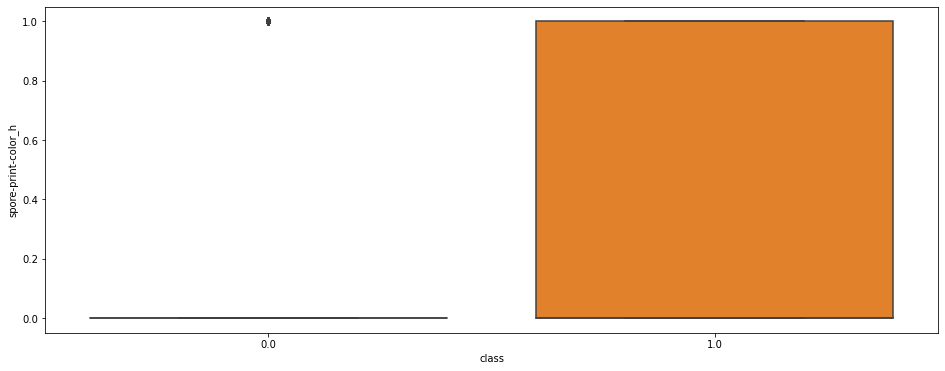

In [150]:
sns.boxplot(x='class', y='spore-print-color_h', data=train_df);

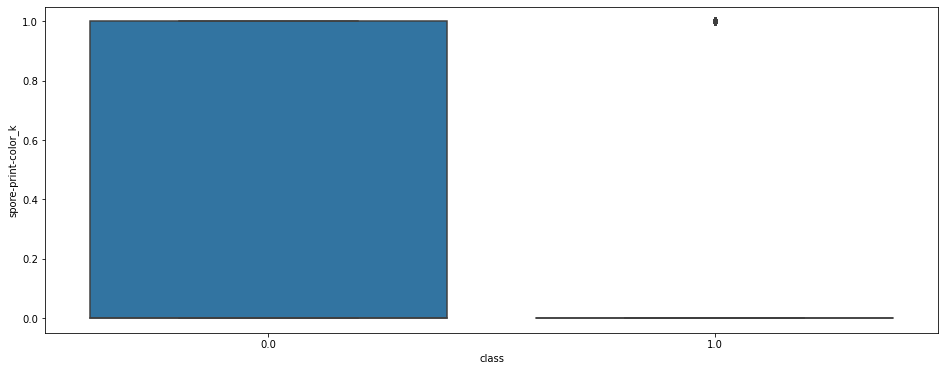

In [151]:
sns.boxplot(x='class', y='spore-print-color_k', data=train_df);

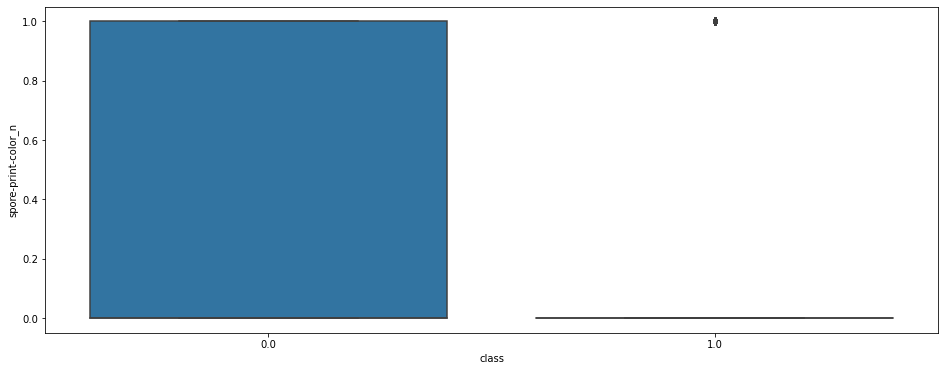

In [152]:
sns.boxplot(x='class', y='spore-print-color_n', data=train_df);

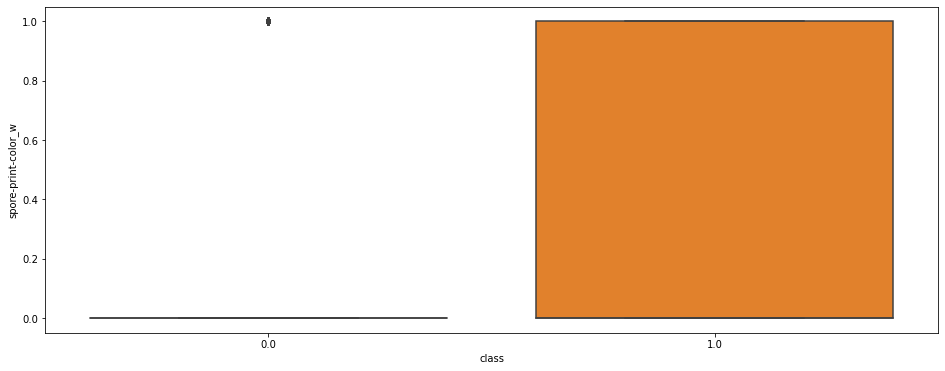

In [153]:
sns.boxplot(x='class', y='spore-print-color_w', data=train_df);

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y